#### Aluno 
- Isaque Elcio de Souza (RA: 225310)

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, fowlkes_mallows_score, adjusted_rand_score, jaccard_score
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../Trabalho02/dados/ex2data.csv', sep='\s+', header=None)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-10.63,-3.91,27.69,2.32,-8.17,-6.15,-2.45,-10.30,-5.62,7.98,5.32,1.35,-4.56
1,12.56,-19.50,4.39,1.53,-3.55,-15.97,-9.16,4.88,5.72,1.58,-3.41,-1.85,2.55
2,4.19,-12.30,-22.25,-6.14,7.47,12.42,6.47,-3.35,-10.22,8.19,5.50,11.08,-2.19
3,-6.38,-18.36,-6.67,-1.42,-3.67,13.01,3.23,-7.46,-3.01,-4.39,-3.40,-1.06,8.25
4,-16.33,0.41,1.56,-10.51,9.37,-3.81,-5.21,-2.16,-6.41,-8.93,-8.05,3.81,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16.61,-14.12,-0.55,3.00,12.30,-0.11,2.85,-0.18,10.13,-5.37,-8.28,-10.78,2.00
996,-30.76,10.46,-1.95,-6.10,-1.55,8.68,1.35,-0.05,-3.93,-1.74,-7.33,-4.93,-3.53
997,9.61,-21.71,10.19,-8.49,-10.63,-9.37,-6.96,3.31,-2.23,5.86,-2.00,2.94,7.31
998,-14.32,-4.46,-4.53,-7.15,2.38,-14.32,6.34,3.93,-0.81,-13.97,-3.52,-1.13,5.46


### 1 - k means
- Rode o kmeans com k de 2 a 15.
- Use silhueta e pelo menos alguma outra medida interna de qualidade
- Moste os graficos dessas medidas versus o k

In [20]:
n_clusters = range(2,16)
silhouette = []
davies_bouldin = []
calinski_harabasz = [] 
for n_cluster in n_clusters:
    clusterer = KMeans(n_cluster)
    cluster_labels = clusterer.fit(df.values)
       
    silhouette.append(silhouette_score(df.values, clusterer.labels_))
    davies_bouldin.append(davies_bouldin_score(df.values, clusterer.labels_))
    calinski_harabasz.append(calinski_harabasz_score(df.values, clusterer.labels_))   


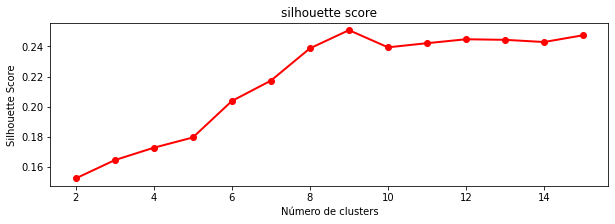

In [21]:
plt.figure(figsize=(10, 3))
plt.plot(n_clusters, silhouette, 'ro-', linewidth=2)
plt.title('silhouette score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

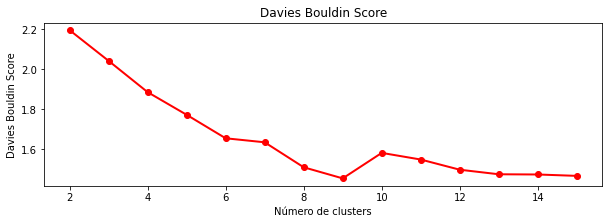

In [22]:
plt.figure(figsize=(10, 3))
plt.plot(n_clusters, davies_bouldin, 'ro-', linewidth=2)
plt.title('Davies Bouldin Score')
plt.xlabel('Número de clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

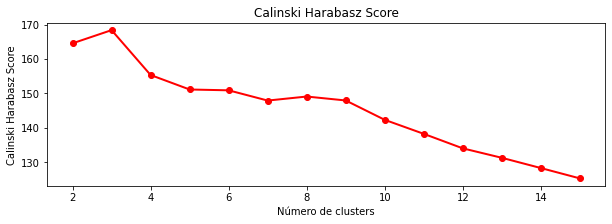

In [23]:
plt.figure(figsize=(10, 3))
plt.plot(n_clusters, calinski_harabasz, 'ro-', linewidth=2)
plt.title('Calinski Harabasz Score')
plt.xlabel('Número de clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

### 2 - Escolha um k

- Para a silhouette o maior valor representa o melhor numero de K.
- O davies_bouldin o valor mais baixo indica o melhor valor para K.
- O calinski_harabasz a pontuação mais alta indica o melhor valor de k. 


In [24]:
silhouette_max = silhouette.index(max(silhouette))
davies_bouldin_min = davies_bouldin.index(min(davies_bouldin))
calinski_harabasz_max = calinski_harabasz.index(max(calinski_harabasz))

print(" O melhor k retornado pelo silhouette é:", silhouette_max + 2)
print(" O melhor k retornado pelo davies bouldin é:", davies_bouldin_min + 2)
print(" O melhor k retornado pelo calinski harabasz é:", calinski_harabasz_max + 2)

 O melhor k retornado pelo silhouette é: 9
 O melhor k retornado pelo davies bouldin é: 9
 O melhor k retornado pelo calinski harabasz é: 3


Calinski-Harabasz geralmente apresenta melhores resultados em clusters convexos, baseado em densidade, obtidos com o DBSCAN.
Neste caso, considerando o k do silhouette e do davies bouldin, podemos escolher o número de clusters (k) igual a 9.
 

### 3-GMM

usando o k escolhido no item anterior, rode o GMM

- com gaussianas esféricas (matrizes de covariancia sao a matriz identidade vezes uma constante)
- com gaussianas diagonais (matrizes de covariancia sao matrizes diagonais)
- com gaussianas sem restrição (as matrizes de covariancia são livres

In [94]:
gmm_spherical = GaussianMixture(n_components=9, covariance_type='spherical',n_init=1).fit(df.values)
gmm_diag = GaussianMixture(n_components=9, covariance_type='diag',n_init=1).fit(df.values)
gmm_full = GaussianMixture(n_components=9, covariance_type='full',n_init=1).fit(df.values)

# Resultados
gmm_spherical_result = gmm_spherical.predict(df.values)
gmm_diag_result = gmm_diag.predict(df.values)
gmm_full_result = gmm_full.predict(df.values)

### 4- Medidas externas para comparar duas clusterizações
GMM nao produz uma clustrerização tradicional onde cada dado é associado a UM cluster. Para dado, GMM associa um probabilidade do dado pertencer a cada um dos clusters. Para usar as medidas de concordancia entre clusterizações, as clusterizações precisam
- Se pelo menos 2 medidas externas para comparar a solução do GMM sem restrição (full) com as outras 2 (esférica e diagonal).
- Reporte os resultados

In [96]:
fowlkes_full_spherical = fowlkes_mallows_score(gmm_full_result, gmm_spherical_result)
fowlkes_full_diag = fowlkes_mallows_score(gmm_full_result, gmm_diag_result)

print('Índice de Fowlkes e Mallows\nGMM sem restrição e GMM esféricas (spherical):', fowlkes_full_spherical)
print('GMM sem restrição e GMM diagonais (diagonal):', fowlkes_full_diag)

Índice de Fowlkes e Mallows
GMM sem restrição e GMM esféricas (spherical): 0.6553437581619336
GMM sem restrição e GMM diagonais (diagonal): 0.7180143066820287


In [97]:
rand_full_spherical = adjusted_rand_score(gmm_full_result, gmm_spherical_result)
rand_full_diag = adjusted_rand_score(gmm_full_result, gmm_diag_result)

print('Índice de Rand (adjusted) \nGMM sem restrição e GMM esféricas (spherical):', rand_full_spherical)
print('GMM sem restrição e GMM diagonais (diagonal):', rand_full_diag)

Índice de Rand (adjusted) 
GMM sem restrição e GMM esféricas (spherical): 0.5982060246323156
GMM sem restrição e GMM diagonais (diagonal): 0.6796029157180037


- Índice de Fowlkes e Mallows varia de 0 a 1 e mede a similaridade de dois agrupamentos de um conjunto de pontos. O valor mais proximo de 1 indica que a semelhança entre os grupos.
- Índice de Rand Ajustado calcula uma medida de similaridade entre dois agrupamentos, intervalo de 0,0 a 1,0, sendo 1,0 para grupos com maior semelhança. 
